In [106]:
import pandas as pd

data=pd.read_csv("Data/logistic regression titanic/train.csv",index_col="PassengerId")
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [107]:
from sklearn import preprocessing
data_util=data.drop(labels=["Ticket","Name","Cabin","SibSp","Parch"],axis=1)
data_util["Embarked"]=data["Embarked"].astype(str)
data_util.head()



,Survived,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,,
1,0,3,male,22.0,7.2500,S
2,1,1,female,38.0,71.2833,C
3,1,3,female,26.0,7.9250,S
4,1,1,female,35.0,53.1000,S
5,0,3,male,35.0,8.0500,S


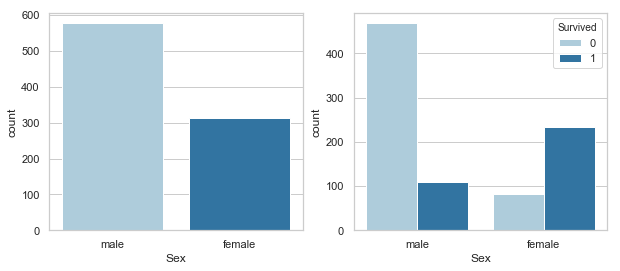

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_context("notebook")
sns.set_palette("Paired")
%matplotlib inline
f,ax=plt.subplots(1,2,figsize=(10,4))
sns.countplot(data=data_util,x="Sex",hue="Survived",ax=ax[1])
sns.countplot(data=data_util,x="Sex",ax=ax[0])

Text(0.5, 1.0, 'Porcentaje de supervivencia')

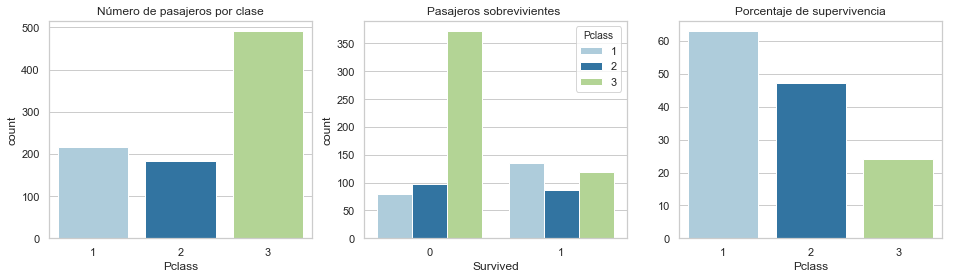

In [109]:
f,ax=plt.subplots(1,3,figsize=(16,4))


data_util.groupby("Pclass")["Survived"].value_counts()
survived_class=data_util[data_util["Survived"]==1].groupby("Pclass")["Survived"].count()
total_class=data_util.groupby("Pclass")["Survived"].count()
porcentajes=100*survived_class/total_class

sns.countplot(data=data_util,x="Pclass",ax=ax[0])
sns.countplot(data=data_util,x="Survived",hue="Pclass",ax=ax[1],)
sns.barplot(x=porcentajes.index,y=porcentajes.values)

ax[0].set_title("Número de pasajeros por clase")
ax[1].set_title("Pasajeros sobrevivientes ")
ax[2].set_title("Porcentaje de supervivencia")






In [110]:
le=preprocessing.LabelEncoder()
data_cat=data_util.copy()
data_cat["Embarked"]=le.fit_transform(data_cat["Embarked"])
data_cat["Male"]=le.fit_transform(data_cat["Sex"])
data_cat=data_cat.drop(columns=["Sex"])
data_cat.head()

,Survived,Pclass,Age,Fare,Embarked,Male
PassengerId,,,,,,
1,0,3,22.0,7.2500,2,1
2,1,1,38.0,71.2833,0,0
3,1,3,26.0,7.9250,2,0
4,1,1,35.0,53.1000,2,0
5,0,3,35.0,8.0500,2,1
